# Step 1: Loading data and Preprocessing

In [96]:
import numpy as np
import pandas as pd
import librosa
import os
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image as im

In [71]:
meta = pd.read_csv("./birdsdata/metadata.csv")
meta.head()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,date,filename,license,rating,time,url
0,acafly,['amegfi'],"['begging call', 'call', 'juvenile']",35.3860,-84.1250,Empidonax virescens,Acadian Flycatcher,Mike Nelson,2012-08-12,XC109605.ogg,Creative Commons Attribution-NonCommercial-Sha...,2.5,09:30,https://www.xeno-canto.org/109605
1,acafly,[],['call'],9.1334,-79.6501,Empidonax virescens,Acadian Flycatcher,Allen T. Chartier,2000-12-26,XC11209.ogg,Creative Commons Attribution-NonCommercial-Sha...,3.0,?,https://www.xeno-canto.org/11209
2,acafly,[],['call'],5.7813,-75.7452,Empidonax virescens,Acadian Flycatcher,Sergio Chaparro-Herrera,2012-01-10,XC127032.ogg,Creative Commons Attribution-NonCommercial-Sha...,3.0,15:20,https://www.xeno-canto.org/127032
3,acafly,['whwbec1'],['call'],4.6717,-75.6283,Empidonax virescens,Acadian Flycatcher,Oscar Humberto Marin-Gomez,2009-06-19,XC129974.ogg,Creative Commons Attribution-NonCommercial-Sha...,3.5,07:50,https://www.xeno-canto.org/129974
4,acafly,['whwbec1'],['call'],4.6717,-75.6283,Empidonax virescens,Acadian Flycatcher,Oscar Humberto Marin-Gomez,2009-06-19,XC129981.ogg,Creative Commons Attribution-NonCommercial-Sha...,3.5,07:50,https://www.xeno-canto.org/129981


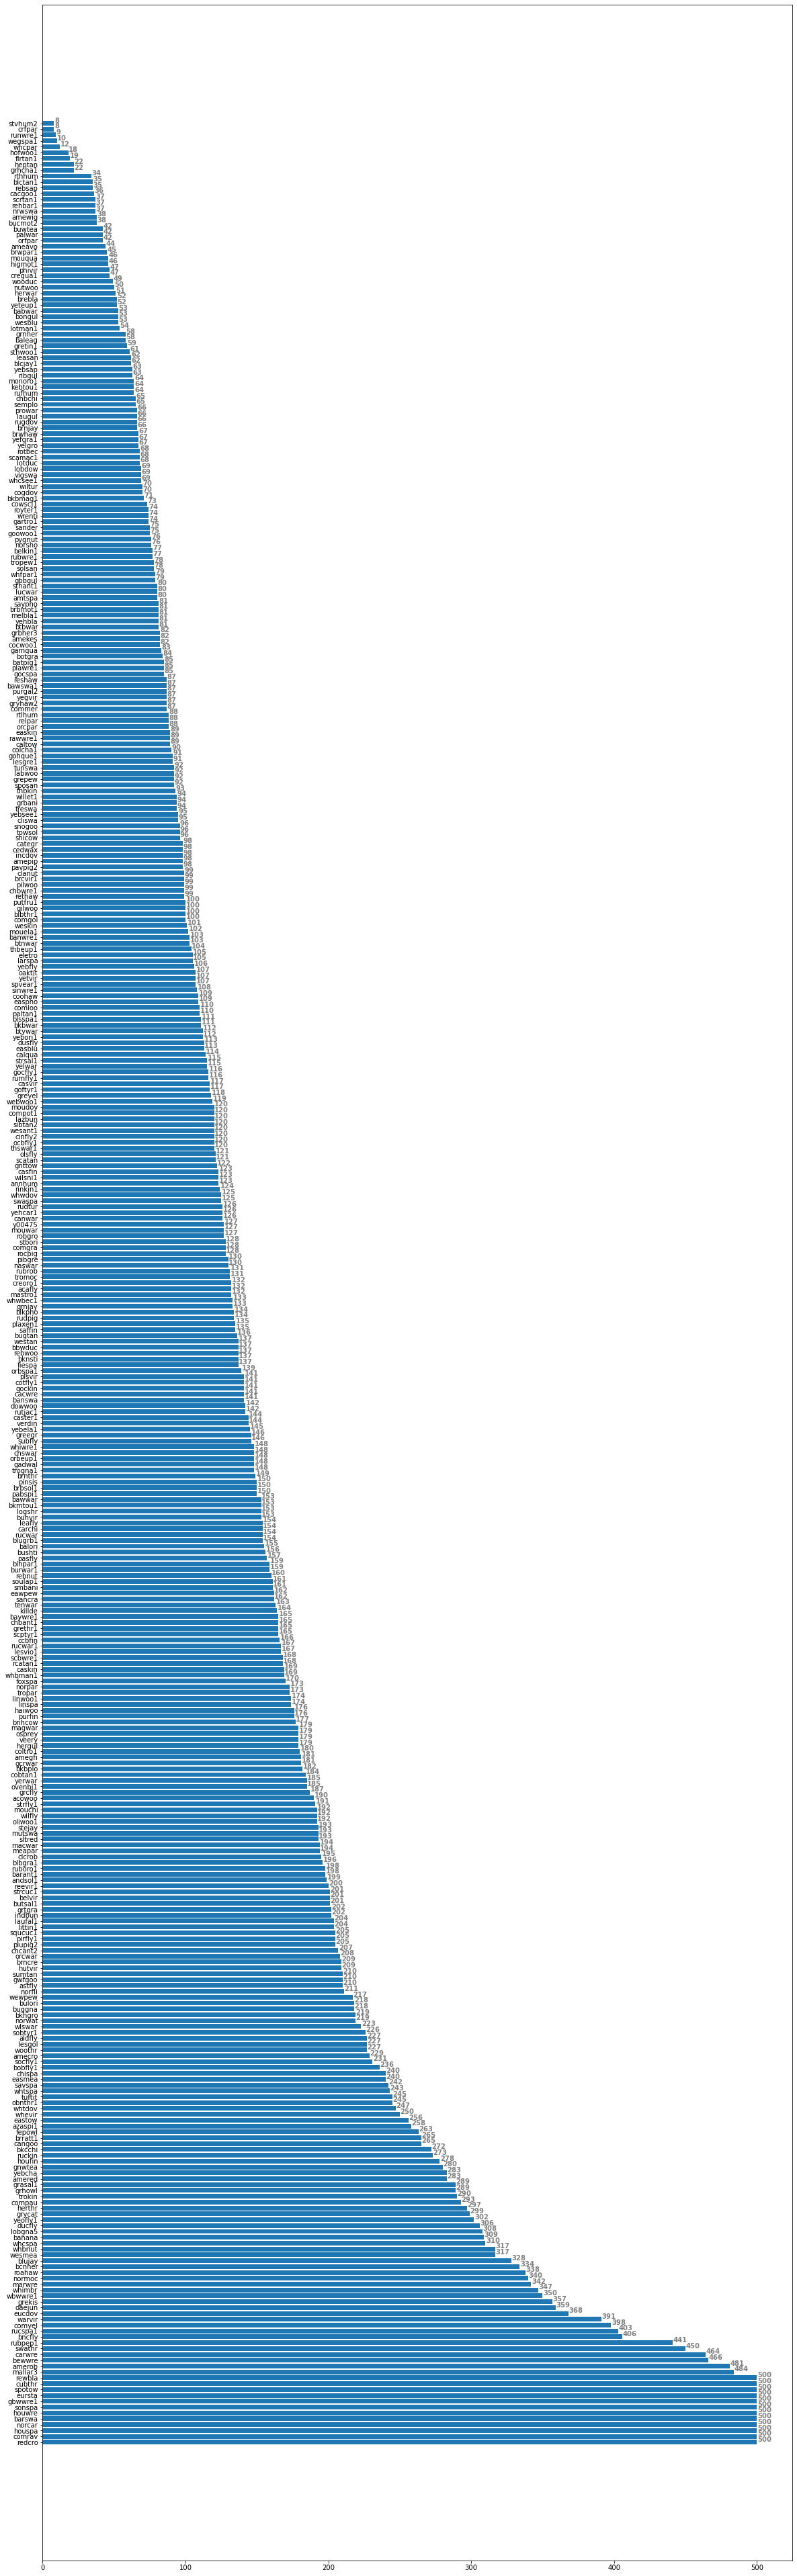

In [118]:
birds_type = meta['primary_label'].value_counts()

fig, ax = plt.subplots(figsize=(20,70))
ax.barh(birds_type.index, birds_type.values)
ax.xaxis.set_tick_params(pad = 2)
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
plt.show()

In [31]:
FMIN = 500
FMAX = 12500
SPEC_HEIGHT = 64
SPEC_WIDTH = 256
NUM_MELS = SPEC_HEIGHT
HOP_LENGTH = int(32000 * 5 / (SPEC_WIDTH - 1))

In [68]:
def load_data(training_path, bird_type, output_path):
    audio_num = 1
    for path, subdir, audio_files in os.walk(training_path):
        for audio_file in audio_files:
            audio_num += 1
            # split the sounds into chunks
            audio_file = os.path.join(path, audio_file)
            signal, ratio = librosa.load(audio_file, sr=32000)
            frag_len = 480000
            signals = []
            for i in range(0, len(signal), frag_len):
                sig_frag = signal[i:i+frag_len]
                if len(sig_frag) < frag_len:
                    break
                signals.append(sig_frag)
            count = 1
            for frag in signals:
                spec = librosa.feature.melspectrogram(y=frag, 
                                                      sr=32000, 
                                                      n_fft=1024,
                                                      hop_length=HOP_LENGTH, 
                                                      n_mels=NUM_MELS,
                                                      fmin=FMIN,
                                                      fmax=FMAX)
                spec = librosa.power_to_db(spec, ref=np.max)
                spec -= spec.min()
                spec /= spec.max()
                
                o_path = os.path.join(output_path, bird_type)
                if not os.path.exists(o_path):
                    os.makedirs(o_path)
                image_path = os.path.join(o_path, bird_type + "_" + str(audio_num) + "_" + str(count)+".png")
                count += 1
                image = im.fromarray(spec * 255.0).convert("L")
                
                image.save(image_path)
                

In [122]:
inputs = "./birdsdata/train_short_audio/"
for bird in os.listdir(inputs):
    load_data(inputs+bird+"/", bird, "./birdsdata/pic/")
    print("finishing loading and processing to image of: "+bird)


finishing loading and processing to image of: olsfly
finishing loading and processing to image of: houspa
finishing loading and processing to image of: semplo
finishing loading and processing to image of: thbkin
finishing loading and processing to image of: prowar
finishing loading and processing to image of: lotman1
finishing loading and processing to image of: sthwoo1


/var/folders/bh/kzp19w691fg91px7phgp9wn00000gn/T/ipykernel_61061/1590809419.py:27: RuntimeWarning: invalid value encountered in true_divide
  spec /= spec.max()


finishing loading and processing to image of: cogdov
finishing loading and processing to image of: brnthr
finishing loading and processing to image of: ducfly
finishing loading and processing to image of: banwre1
finishing loading and processing to image of: compau
finishing loading and processing to image of: baywre1
finishing loading and processing to image of: gamqua
finishing loading and processing to image of: mutswa
finishing loading and processing to image of: belkin1
finishing loading and processing to image of: yegvir
finishing loading and processing to image of: bkhgro
finishing loading and processing to image of: gohque1
finishing loading and processing to image of: comrav
finishing loading and processing to image of: herwar
finishing loading and processing to image of: cinfly2
finishing loading and processing to image of: gocfly1
finishing loading and processing to image of: bnhcow
finishing loading and processing to image of: mouela1
finishing loading and processing to ima